In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Leemos los datos
df = pd.read_excel('data/dieta_oscar_MCD.xlsx')
df.head()

,id,edad,sexo,estado,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,...,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland,gap
0,2014-104,J,Female,NM,9.7584,9.7584,0.0,0.000,0.0000,0.0000,...,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
1,2014-105,J,Male,NM,3.9632,3.9632,0.0,0.000,0.0000,0.0000,...,6.0,251.86,462.0,7.054167,2518.0,34.037969,-108.963777,0.000000,0.798600,Rocky Mountain Ponderosa Pine Woodland
2,2016-133,A,Female,AZ,5.4562,3.8238,0.0,0.000,0.6148,0.0726,...,10.0,574.06,515.0,15.954167,1527.0,31.375725,-110.530491,0.785803,1.245916,Madrean Encinal
3,2014-28,J,Female,NM,4.4976,3.7076,0.0,0.000,0.0000,0.0000,...,8.0,23.07,385.0,10.979167,1952.0,33.176791,-107.735593,0.464732,0.764466,Colorado Plateau Pinyon-Juniper Woodland
4,2016-132,J,Male,AZ,5.4630,2.2011,0.0,0.778,0.3908,0.0000,...,8.0,236.76,521.0,16.133333,1507.0,31.353053,-110.531060,1.680150,1.541562,Apacherian-Chihuahuan Mesquite Upland Scrub


In [4]:
# Obtenemos información de los datos y vemos que no hay datos faltantes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 146 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              object 
 1    edad                            object 
 2    sexo                            object 
 3    estado                          object 
 4    peso total                      float64
 5    Oxalis                          float64
 6    Quercus                         float64
 7    Cyp.bulb                        float64
 8    Phaseolus                       float64
 9    Tephoria                        float64
 10   Caracoles                       float64
 11   Insectos                        float64
 12   Physalis                        float64
 13   Vitis.arizonica                 float64
 14   Lupinus                         float64
 15   Lotus.wrightii                  float64
 16   Cyp.rizo                        float64
 17   Commelina.dian

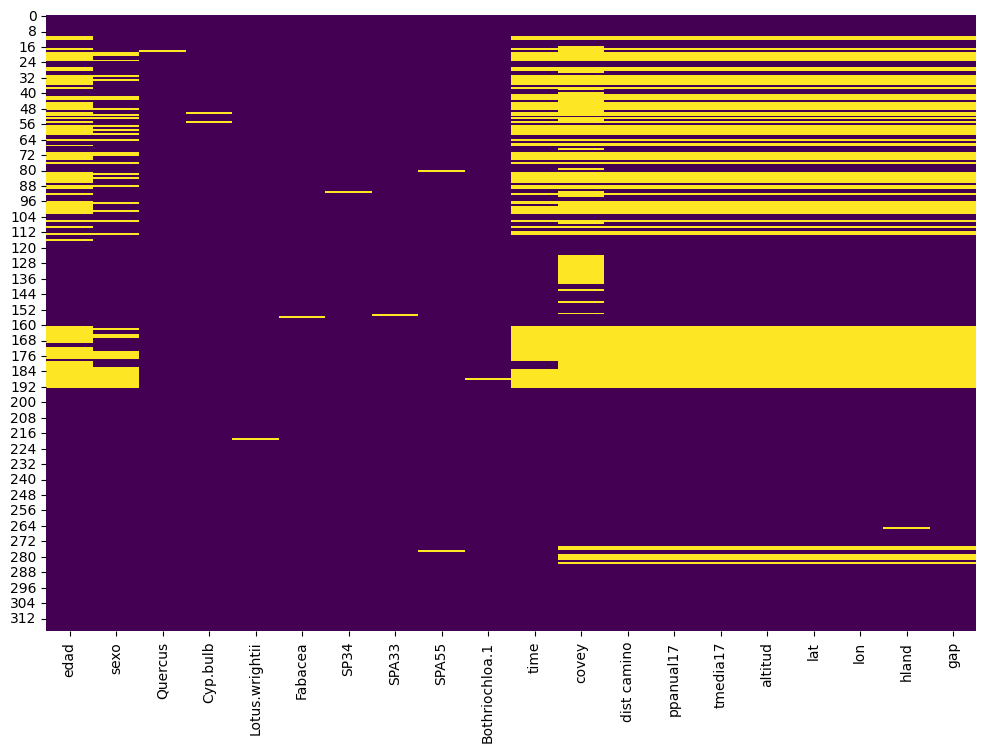

In [5]:

# Filtrar las columnas que tienen valores nulos
columns_with_nulls = df.columns[df.isnull().any()]

# Crear un DataFrame con solo las columnas que tienen nulos
df_with_nulls = df[columns_with_nulls]

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_with_nulls.isnull(), cbar=False, cmap='viridis')
plt.show()

In [6]:
# Escoger columnas relevantes y en función de eso, si esas columnas tienen nulos, eliminarlos 
columnas = ['edad', 'sexo', 'covey', 'altitud', 'lat', 'lon']
# Drop de esas nulls que haya en esas columnas
df = df.dropna(subset=columnas)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 318
Columns: 146 entries, id to gap
dtypes: float64(137), int64(4), object(5)
memory usage: 217.1+ KB


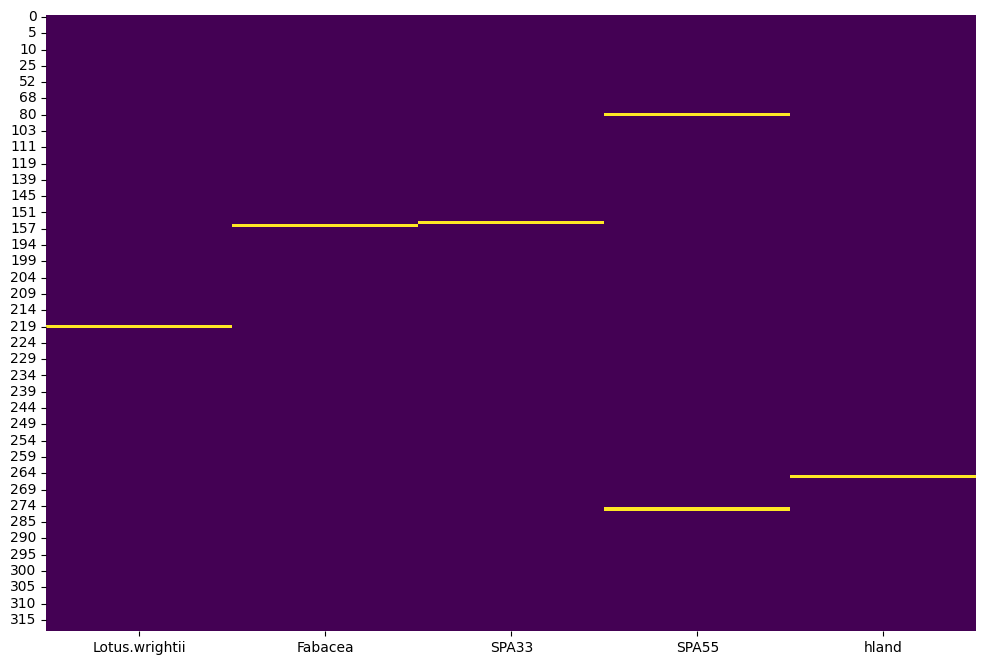

In [7]:
# Filtrar las columnas que tienen valores nulos
columns_with_nulls = df.columns[df.isnull().any()]

# Crear un DataFrame con solo las columnas que tienen nulos
df_with_nulls = df[columns_with_nulls]

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df_with_nulls.isnull(), cbar=False, cmap='viridis')
plt.show()

In [10]:
# Hacemos un pequeño resumen de los datos
df.describe()

,peso total,Oxalis,Quercus,Cyp.bulb,Phaseolus,Tephoria,Caracoles,Insectos,Physalis,Vitis.arizonica,...,time,covey,dist camino,ppanual17,tmedia17,altitud,lat,lon,hcrop,hland
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,188.000000
mean,1.993499,0.155562,0.123856,0.288926,0.338672,0.011569,0.000127,0.116648,0.056907,0.011570,...,1312.645503,9.174603,217.106402,421.349206,13.576146,1730.682540,32.351325,-108.656155,0.524681,0.991539
std,1.850818,0.880783,0.473609,0.776734,1.223911,0.063923,0.001344,0.405455,0.392953,0.122586,...,222.398689,3.789149,188.686264,74.715167,2.130830,233.996897,0.813053,1.487335,0.459415,0.359877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,835.000000,1.000000,6.400000,235.000000,7.054167,1206.000000,31.343850,-111.028040,0.000000,0.222691
25%,0.512800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1130.000000,6.000000,67.300000,373.000000,11.908333,1569.000000,31.513011,-110.531060,0.110159,0.760329
50%,1.532100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1315.000000,10.000000,189.520000,410.000000,14.220833,1694.000000,32.514658,-108.106088,0.503251,0.949498
75%,2.743600,0.000000,0.000000,0.063400,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,...,1505.000000,12.000000,302.620000,485.000000,15.208333,1922.000000,33.165643,-107.683823,0.775682,1.218861
max,9.758400,9.758400,3.620800,6.723300,7.326500,0.666200,0.018000,2.900000,4.471900,1.666400,...,1700.000000,20.000000,774.840000,605.000000,17.312500,2518.000000,34.037969,-105.354701,1.947125,1.796301


In [11]:
# Extraemos el año de la columna 'id'
df['year'] = pd.to_datetime(df['id'], format='%Y-%j').dt.year

# Corregimos la columna 'time' 
df['time'] = pd.to_datetime(df['time'].astype(int).astype(str).str.zfill(4), format='%H%M').dt.strftime('%H:%M')
df.time

0      14:20
1      14:20
2      17:00
3      16:10
4      16:00
       ...  
314    13:00
315    12:30
316    13:00
317    14:30
318    14:30
Name: time, Length: 189, dtype: object

In [12]:
# Resumen de los datos que no sean numéricos
df.describe(include='object')

,id,edad,sexo,estado,time,gap
count,189,189,189,189,189,189
unique,189,2,4,2,46,14
top,2014-104,J,Male,NM,15:00,Madrean Pinyon-Juniper Woodland
freq,1,134,115,136,14,50


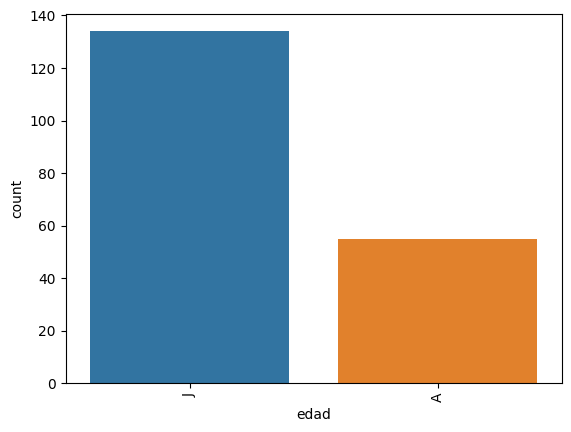

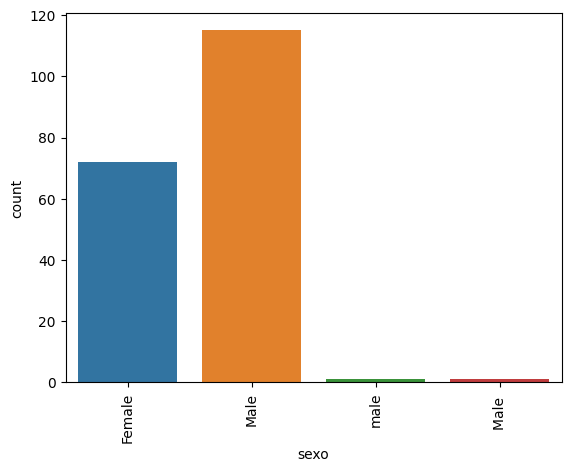

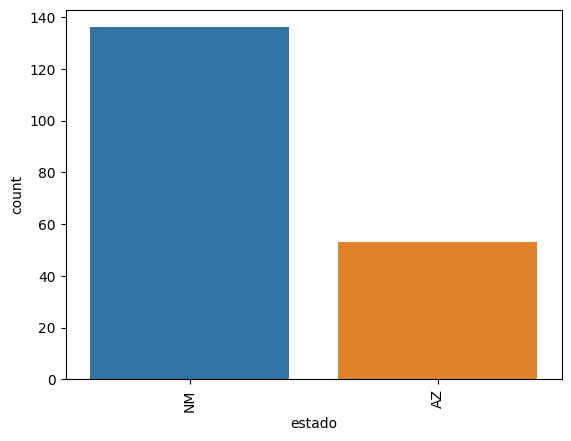

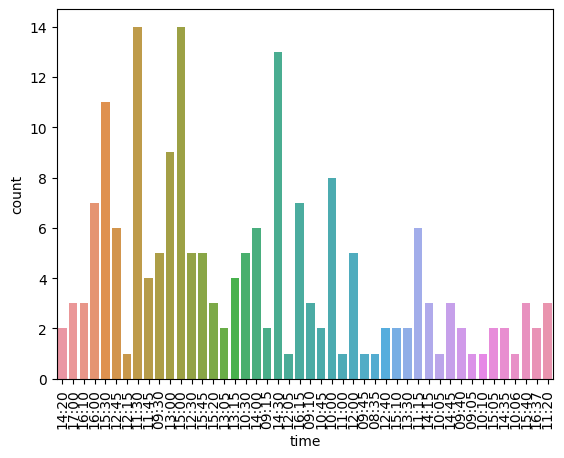

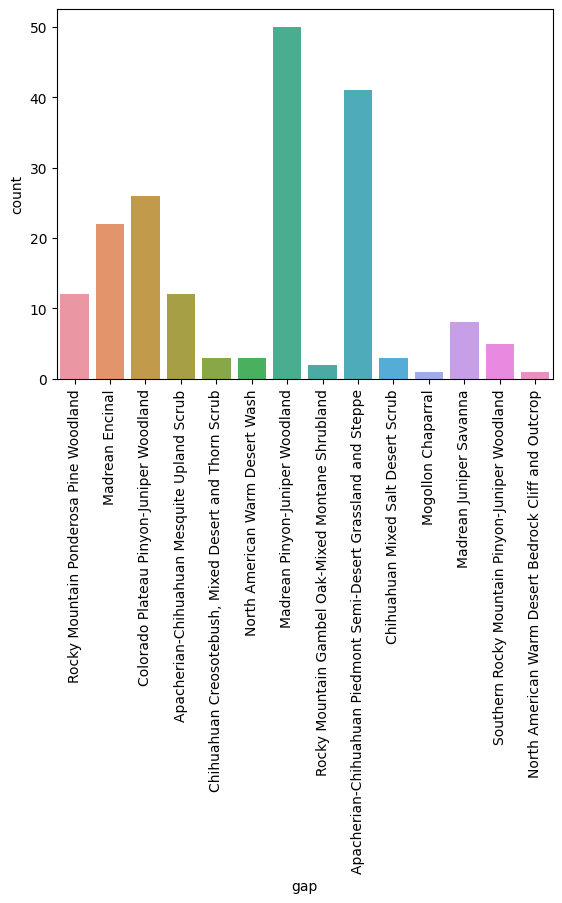

In [13]:
# Hacemos un gráfico de barras para ver la distribución de los datos tipo object
# Ignoramos la primera columna
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        plt.figure()
        sns.countplot(x=col, data=df)
        plt.xticks(rotation=90)
        plt.show()

In [14]:
# Vemos que en el caso de sexo, hay valores repetidos, Male, male, male .
df['sexo'] = df['sexo'].str.strip().str.lower()
df['sexo'].unique()

array(['female', 'male'], dtype=object)

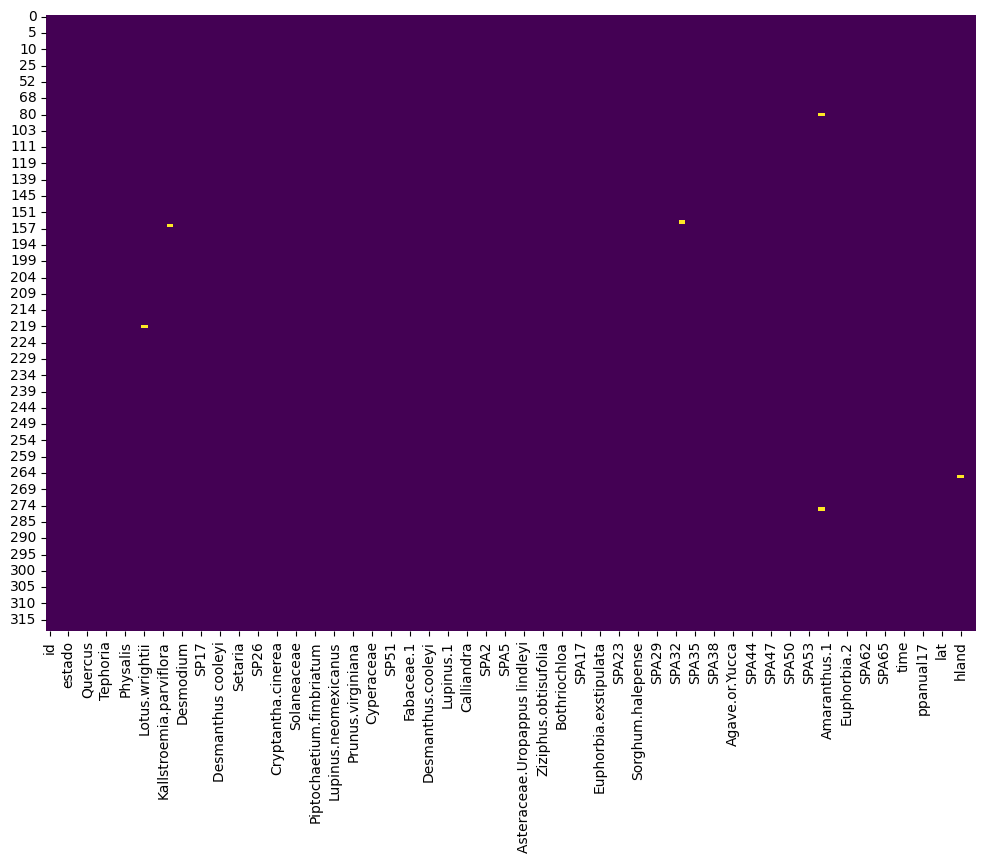

In [15]:
# Volvemos a buscar valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [16]:
# Aparentemente no hay valores faltantes así que guardamos los datos limpios
df.to_csv('data/codornices.csv', index=False)